## Mtto Predictivo

_**Workshop:** Masterclass 4.0_

_**Fecha:** 01/07/2025_

Vamos a dar nuestros primeros pasos con la IA, usando ésta herramienta para predecír fallas en una bomba de agua

-----------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score


from sklearn.preprocessing import MinMaxScaler

# Fuente de los datos: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

In [ ]:
data =  pd.read_csv("/content/sensor.csv")
data.shape

(220320, 55)

# El DataFrame muestra que hay 55 columnas con 220.320 registros. Además, las mediciones tienen diferentes escalas, como se indica a continuación.

In [ ]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
timestamp,0
sensor_00,10208
sensor_01,369
sensor_02,19
sensor_03,19
sensor_04,19
sensor_05,19
sensor_06,4798
sensor_07,5451


### Eliminemos las columnas con demasiados valores nulos o vacíos


In [ ]:
data.drop(['Unnamed: 0', 'timestamp','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

Debemos tener en cuenta que no se especifica claramente qué parámetros operativos, como presión, temperatura, caudal, vibración, etc., mide cada sensor. Sin embargo, hacer un juicio concreto y rápido sobre cuál sensor será decisivo para determinar el estado y funcionamiento de la bomba es muy importante.

En la operación real, los sistemas de bombeo suelen estar equipados con más de un sensor para un mismo parámetro operativo, como presión, caudal o temperatura. Esto puede deberse a razones de seguridad, funcionamiento, confiabilidad del sistema o confianza en el equipo de automatización. Esta redundancia puede provocar superposición en las señales medidas por algunos sensores, como se analiza más adelante.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

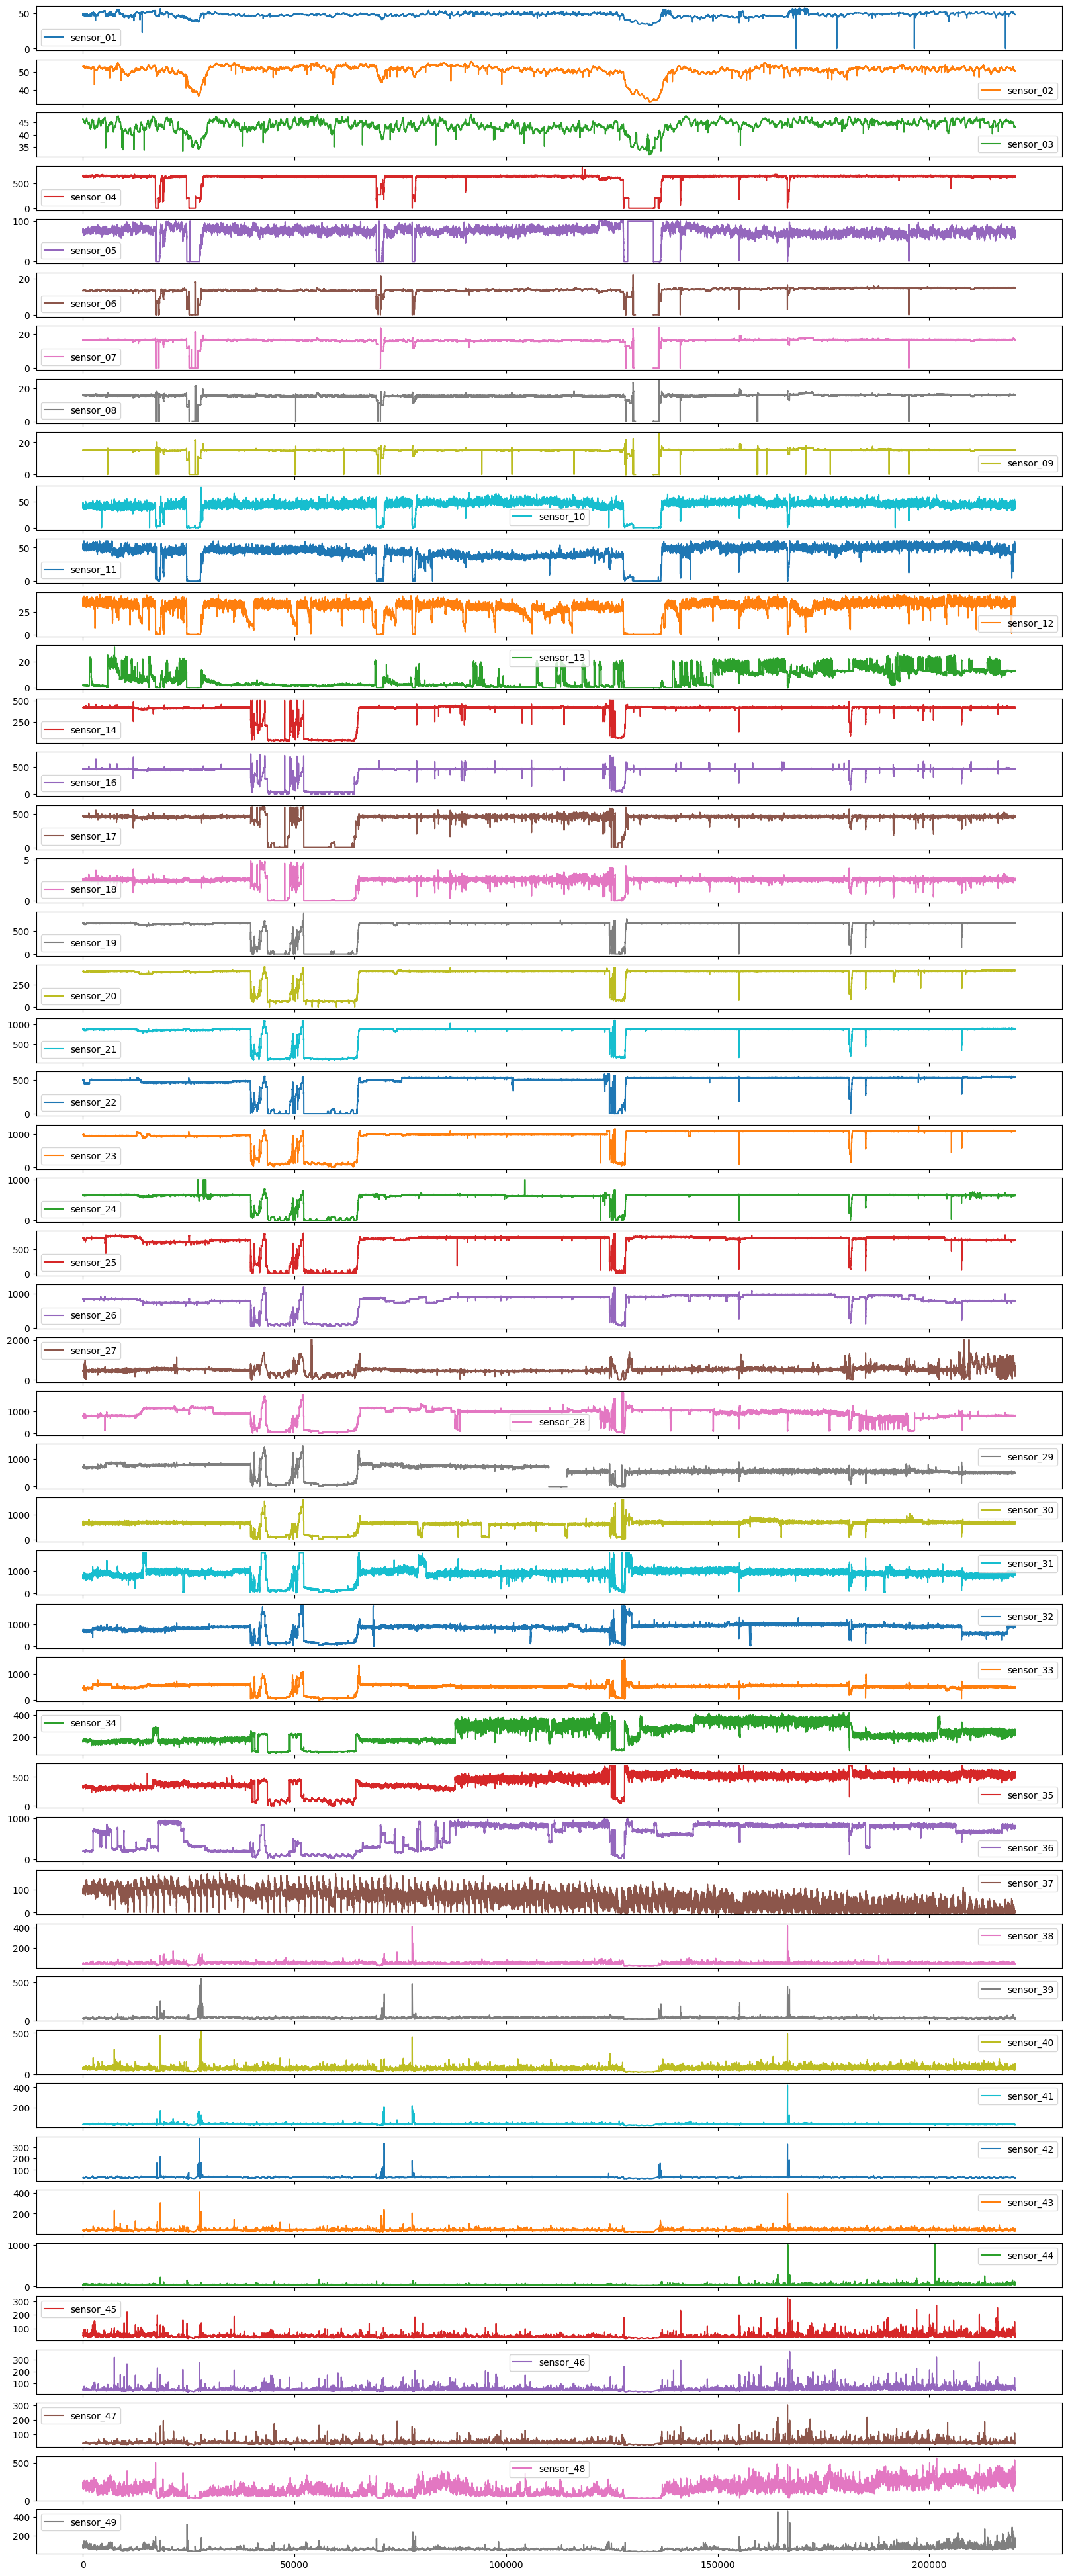

In [ ]:
data.plot(subplots =True, sharex = True, figsize = (20,50))

# Como podemos observar, los sensores estan ordenados según su comportamiento:
+ (1,2,3),
+ (4,5,6,7,8,9),
+ (10,11,12),
+ (14,16,17,18),
+ (19,20,21,22,23,24),
+ (25,26,28,29,30,31,32,33),
+ (34,35),
+ (38,39,40,41,42,43,45,46,47).
    
# A su vez, eliminaremos las señales que no tienen algun comportamiento en particular.

# Debemos determinar cual sensor tiene mayor efecto sobre el estado de la máquina.

In [ ]:
data['machine_status'].value_counts()

,count
machine_status,
NORMAL,205836
RECOVERING,14477
BROKEN,7


La base de datos contiene 7 estados de FALLA (BROKEN), que luego se RECUPERAN (RECOVERED) y regresan a un estado de operación NORMAL. Para simplificar, podemos asumir que el 25% de los datos se utilizará para entrenar el modelo (cubriendo 2 estados de FALLA), y el 75% restante se usará para probar la capacidad de predicción del modelo en función de los parámetros de entrada (cubriendo 5 puntos de FALLA).

Con fines de ilustración gráfica, se asume que las transiciones al estado de FALLA tienen un valor de 0, el estado de RECUPERACIÓN un valor de 0.5, y la operación NORMAL un valor de 1. Estos valores se convierten en una nueva columna llamada: "Operation".

In [ ]:
import numpy as np
conditions = [(data['machine_status'] =='NORMAL'), (data['machine_status'] =='BROKEN'), (data['machine_status'] =='RECOVERING')]
choices = [1, 0, 0.5]
data['Operation'] = np.select(conditions, choices, default=0)

Con el fin de verificar si existen patrones evidentes que puedan identificarse en ciertos períodos, hemos agregado el código "Operation" en las ilustraciones. Esto podría ayudarnos a definir un buen conjunto de datos para ajustar el modelo.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

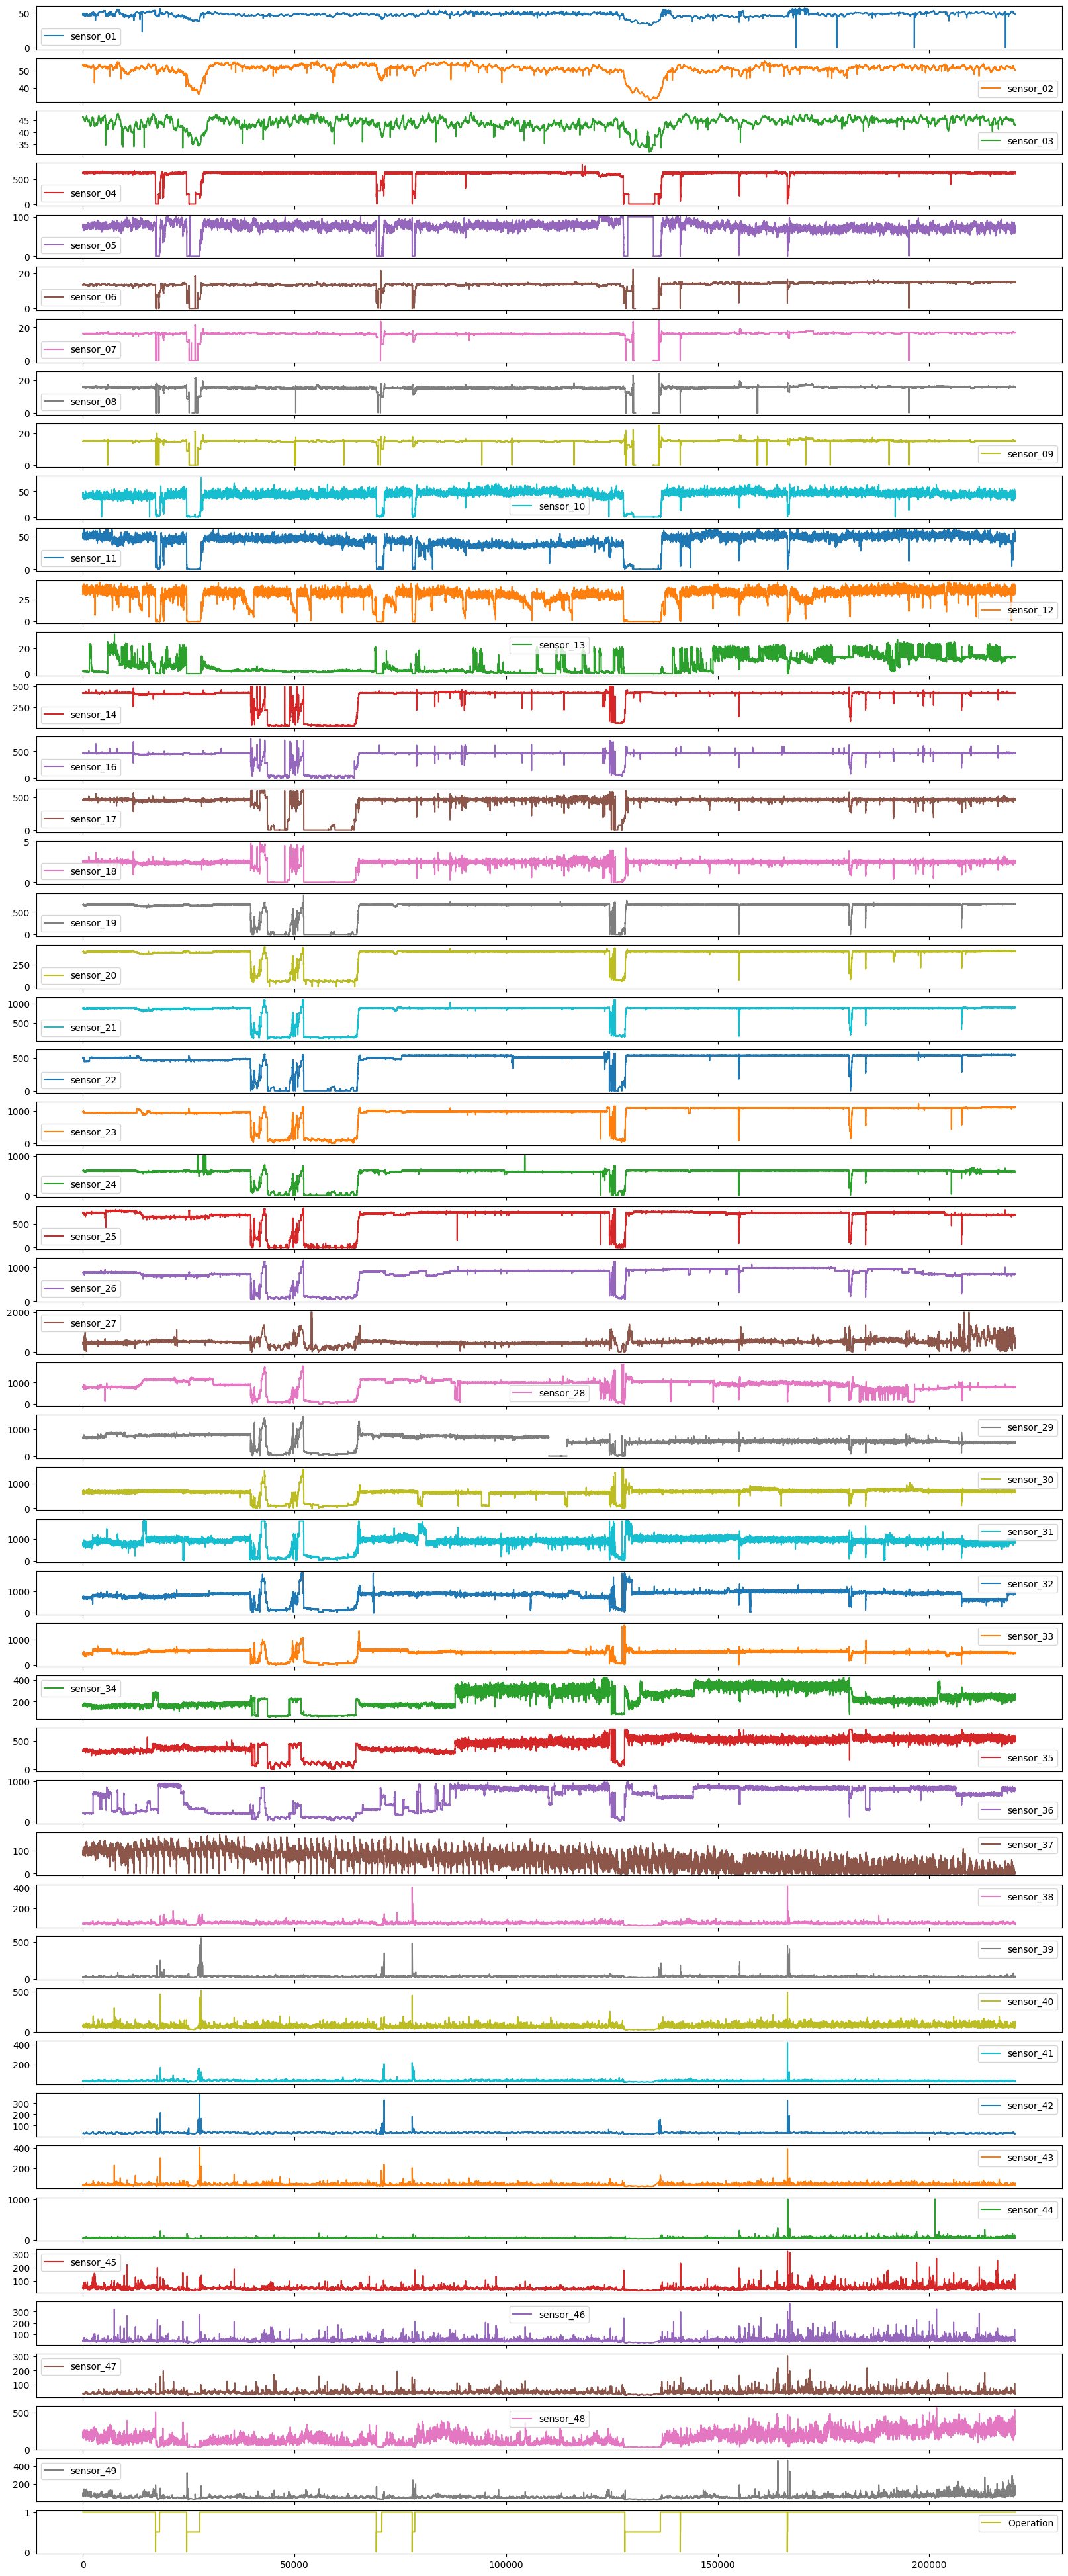

In [ ]:
data.plot(subplots =True, sharex = True, figsize = (20,50))

In [ ]:
data.columns

Index(['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26',
       'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31',
       'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36',
       'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49', 'machine_status', 'Operation'],
      dtype='object')

# Step 2. Assumptions and LSTM model

## Mantendremos solo los sensores de interés y normalizaremos las cantidades para que estén entre -1 y 1.

# Set 0:

In [ ]:
df0 = pd.DataFrame(data, columns=['Operation','sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'])

# Set 1:

In [ ]:
df1 = pd.DataFrame(data, columns=['Operation','sensor_01', 'sensor_04', 'sensor_10', 'sensor_14', 'sensor_19', 'sensor_25'])

# Set 2:

In [ ]:
df2 = pd.DataFrame(data, columns = ['Operation','sensor_02', 'sensor_05', 'sensor_11', 'sensor_16', 'sensor_20', 'sensor_26'])

# Set 3:

In [ ]:
df3 = pd.DataFrame(data, columns = ['Operation','sensor_03', 'sensor_06', 'sensor_12', 'sensor_17', 'sensor_21', 'sensor_28'])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

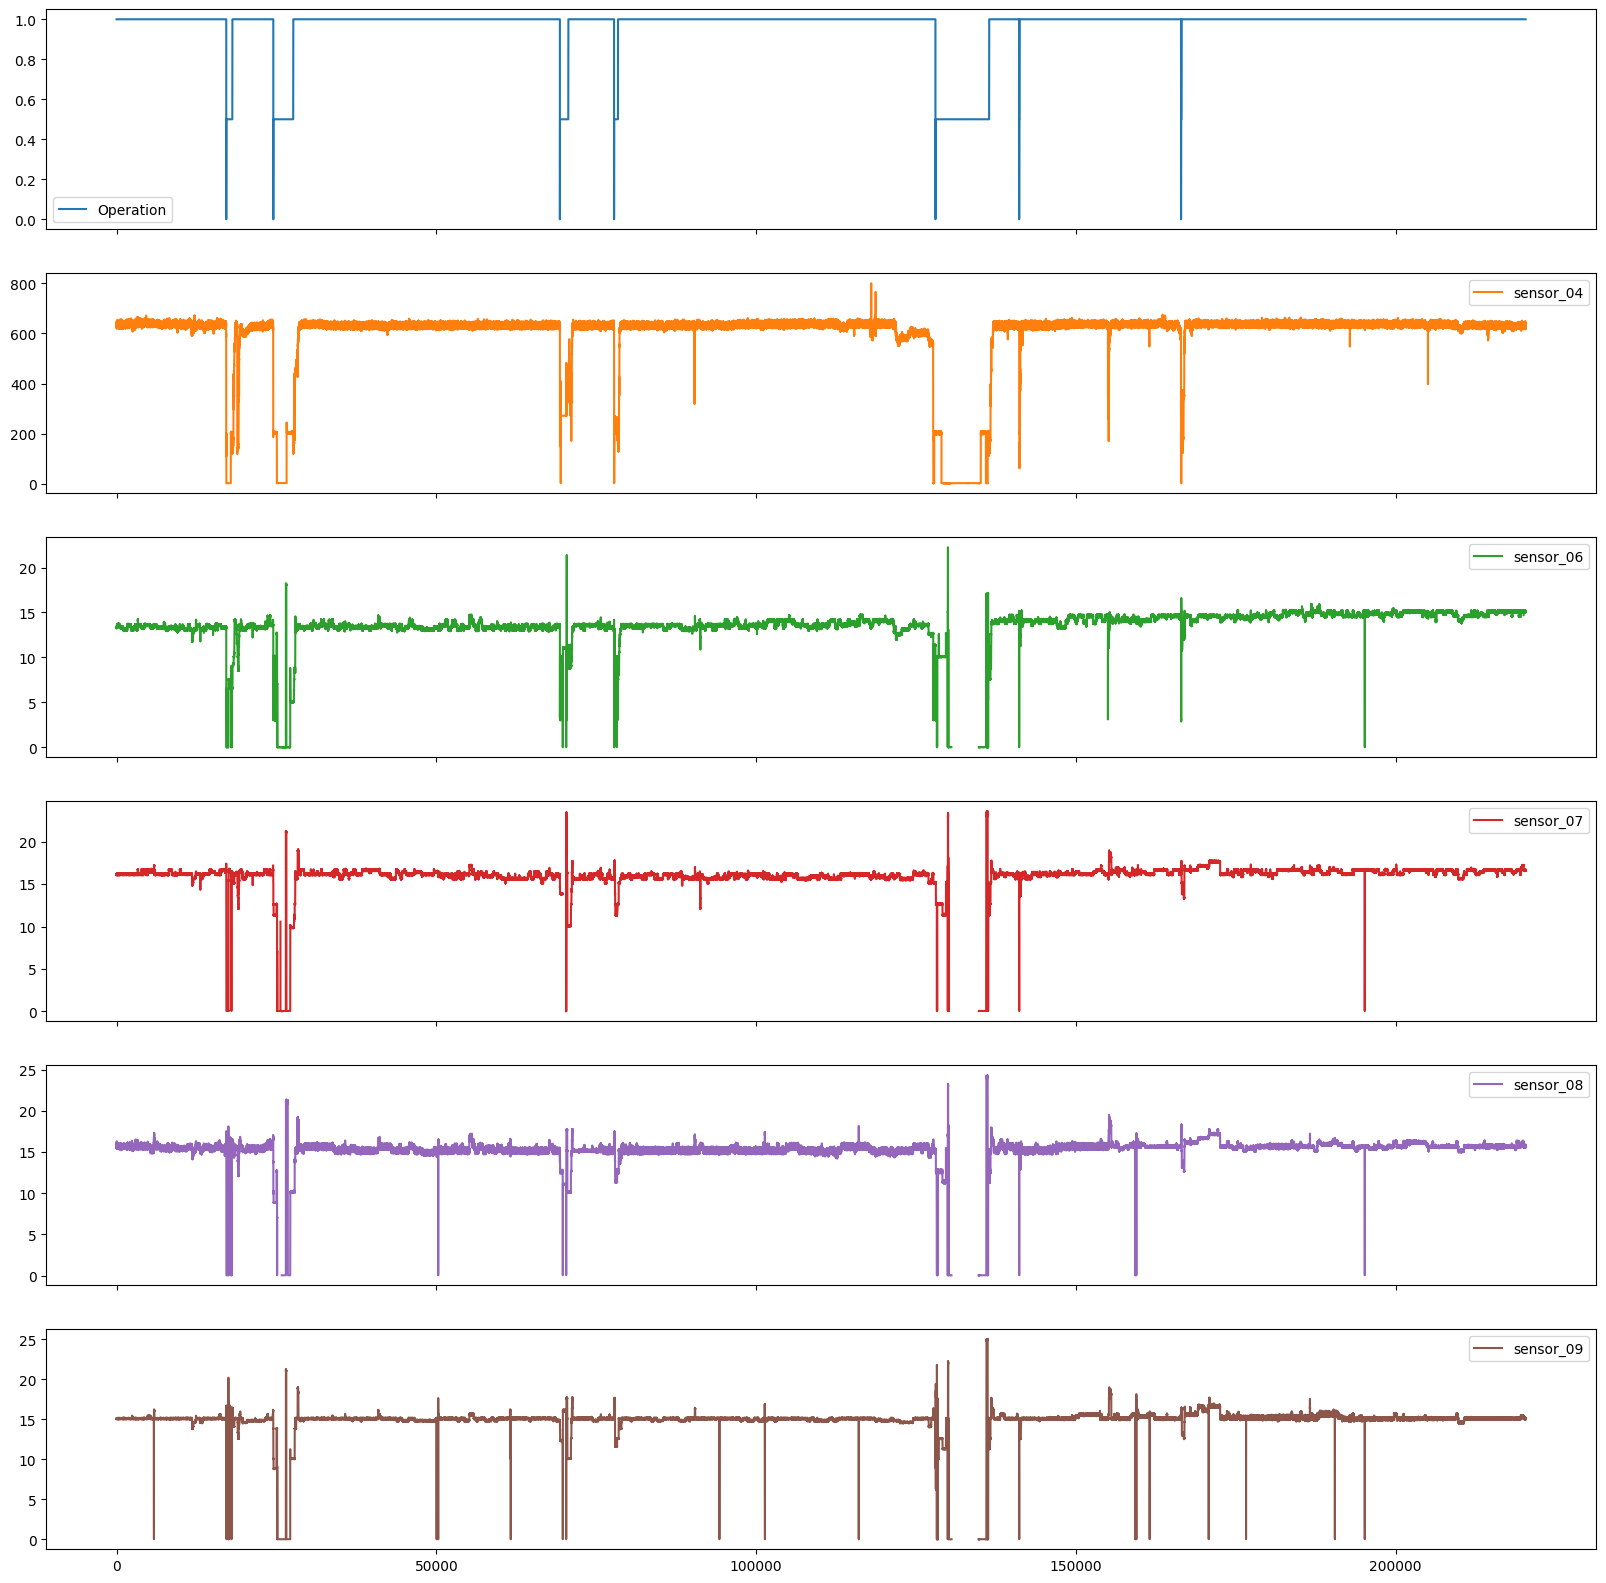

In [ ]:
df0.plot(subplots =True, sharex = True, figsize = (20,20))

# Parece que el dataset 0 correlaciona bastante con las fallas de la máquina.

In [ ]:
df = df0
df.shape

(220320, 6)

# Ahora entrenemos el modelo y generemos predicciones

# Conjunto de entrenamiento:

### Seleccionamos 50.000 puntos de datos con 2 estados de falla para entrenar el modelo.

# Conjunto de prueba:

### Los 170.000 puntos restantes, que contienen 5 estados de falla, se utilizarán para probar la capacidad de predicción del modelo.

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


715/715 - 10s - 14ms/step - loss: 0.0379 - val_loss: 0.0016
Epoch 2/10
715/715 - 7s - 10ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 3/10
715/715 - 8s - 11ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 4/10
715/715 - 13s - 18ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 5/10
715/715 - 14s - 20ms/step - loss: 0.0040 - val_loss: 0.0012
Epoch 6/10
715/715 - 8s - 12ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 7/10
715/715 - 14s - 20ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 8/10
715/715 - 14s - 20ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 9/10
715/715 - 7s - 10ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 10/10
715/715 - 7s - 10ms/step - loss: 0.0032 - val_loss: 9.5518e-04


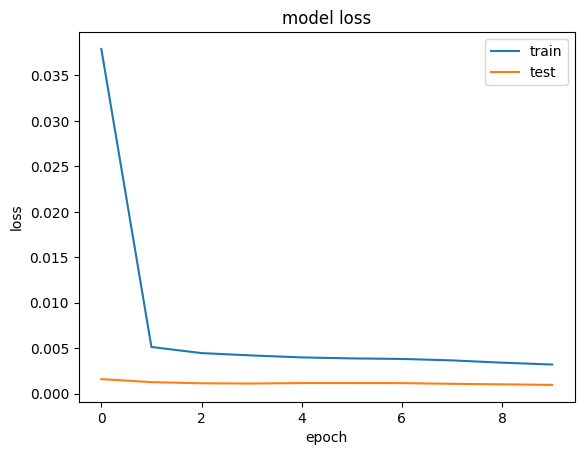

5133/5133 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Test RMSE: 0.031


In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=10, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

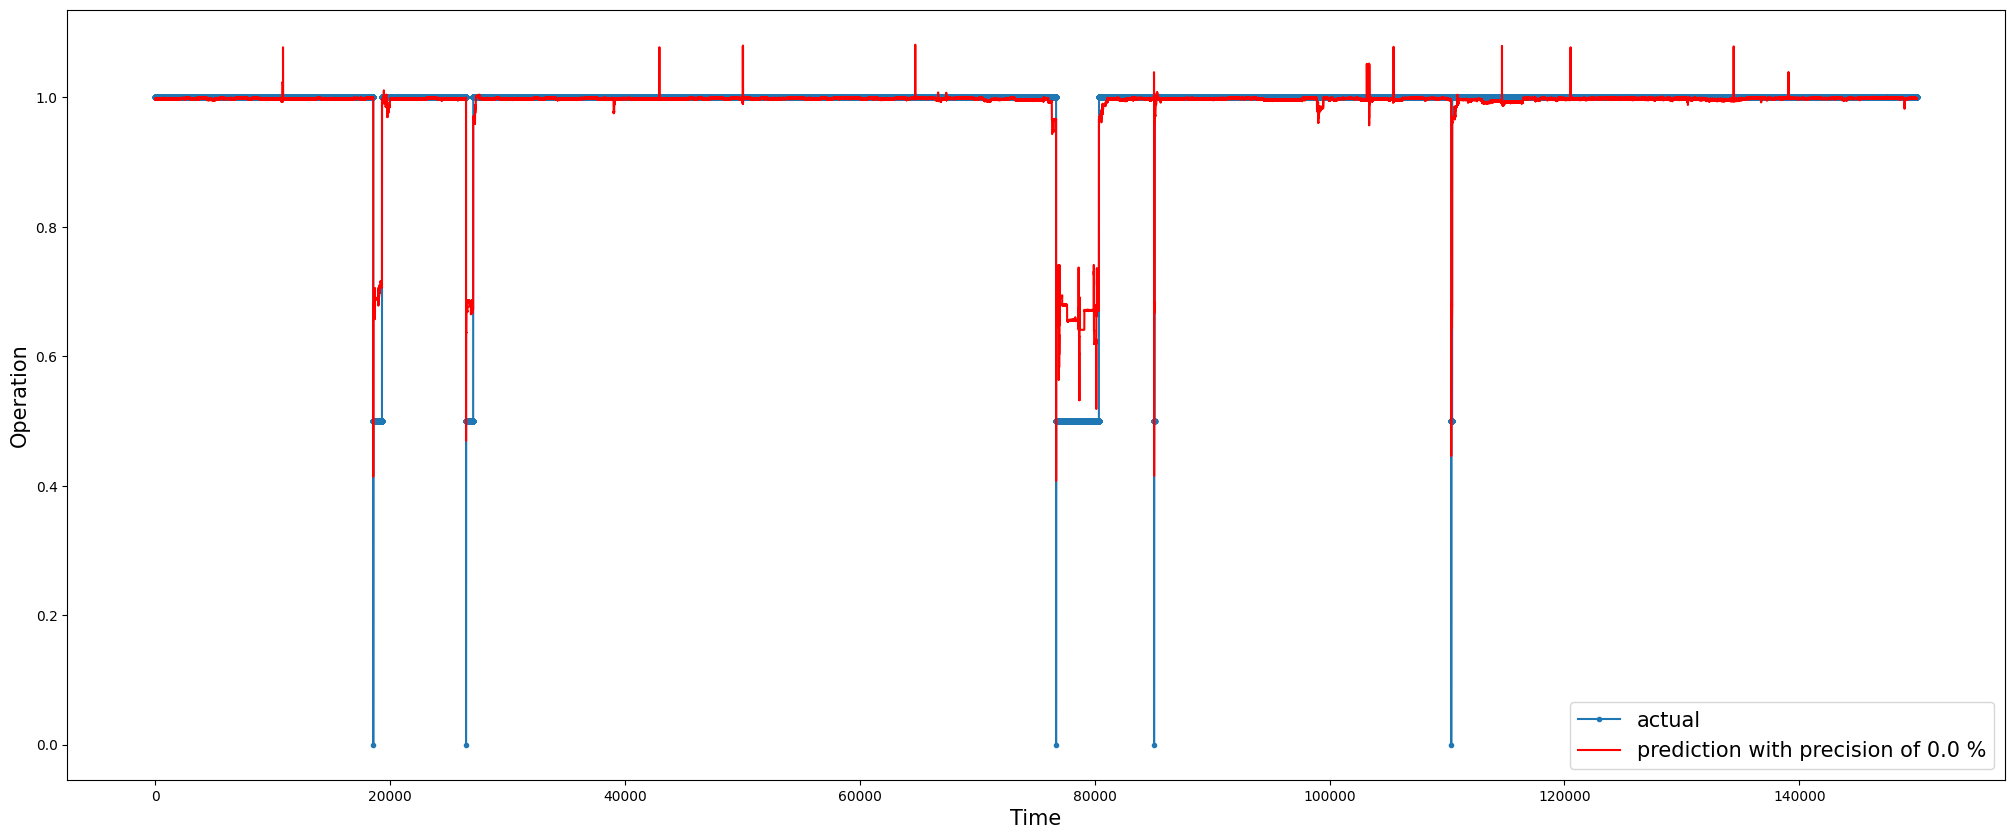

In [ ]:
#import numpy as np
e = np.round(sum(np.abs(inv_y[:]-inv_yhat[:]))/(sum(inv_y[:])*len(inv_y[:]))*100,2)
aa=[x for x in range(150000)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:150000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:150000], 'r', label="prediction with precision of {} %".format(e))
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

# Intentemos ahora con otro grupo de sensores

In [ ]:
df = df2
df.shape

(220320, 7)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

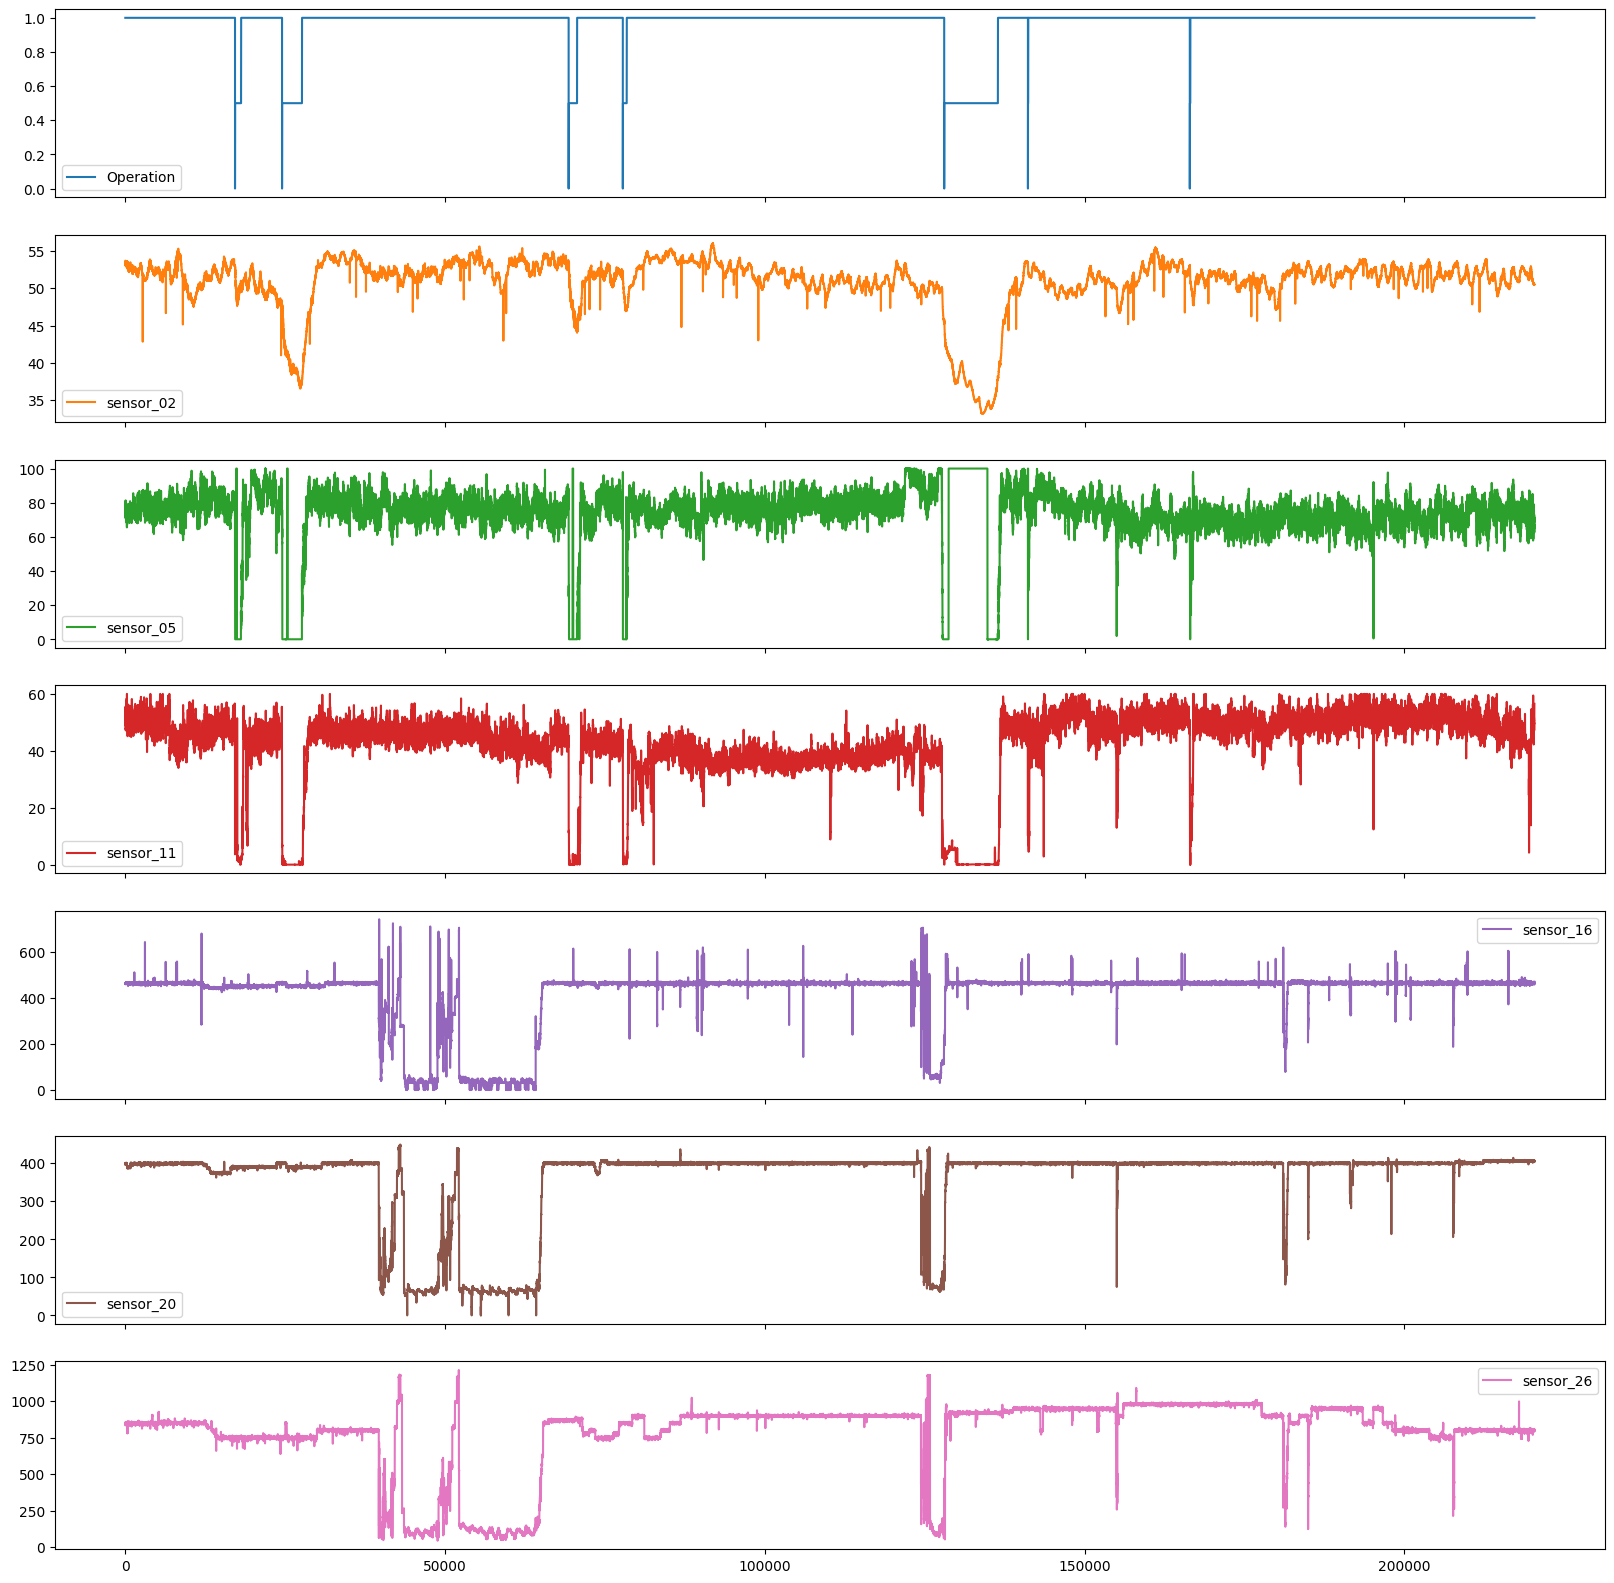

In [ ]:
df2.plot(subplots =True, sharex = True, figsize = (20,20))

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df.shape[1]+1, 2*df.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


715/715 - 15s - 21ms/step - loss: 0.0280 - val_loss: 0.0109
Epoch 2/20
715/715 - 15s - 20ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 3/20
715/715 - 13s - 18ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 4/20
715/715 - 8s - 11ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 5/20
715/715 - 8s - 11ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 6/20
715/715 - 10s - 14ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 7/20
715/715 - 9s - 13ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 8/20
715/715 - 8s - 12ms/step - loss: 0.0045 - val_loss: 0.0073
Epoch 9/20
715/715 - 8s - 11ms/step - loss: 0.0041 - val_loss: 0.0078
Epoch 10/20
715/715 - 10s - 14ms/step - loss: 0.0037 - val_loss: 0.0082
Epoch 11/20
715/715 - 13s - 18ms/step - loss: 0.0034 - val_loss: 0.0086
Epoch 12/20
715/715 - 15s - 21ms/step - loss: 0.0031 - val_loss: 0.0087
Epoch 13/20
715/715 - 7s - 10ms/step - loss: 0.0027 - val_loss: 0.0089
Epoch 14/20
715/715 - 8s - 11ms/step - loss: 0.0024 - val_loss: 0.0086
Epoch 15/20
715/715

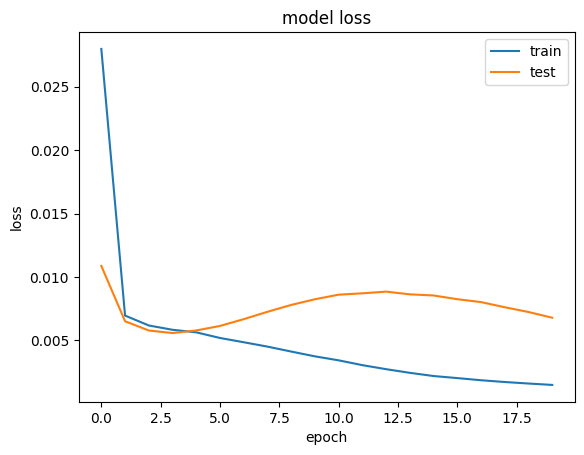

5321/5321 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Test RMSE: 0.082


In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=20, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

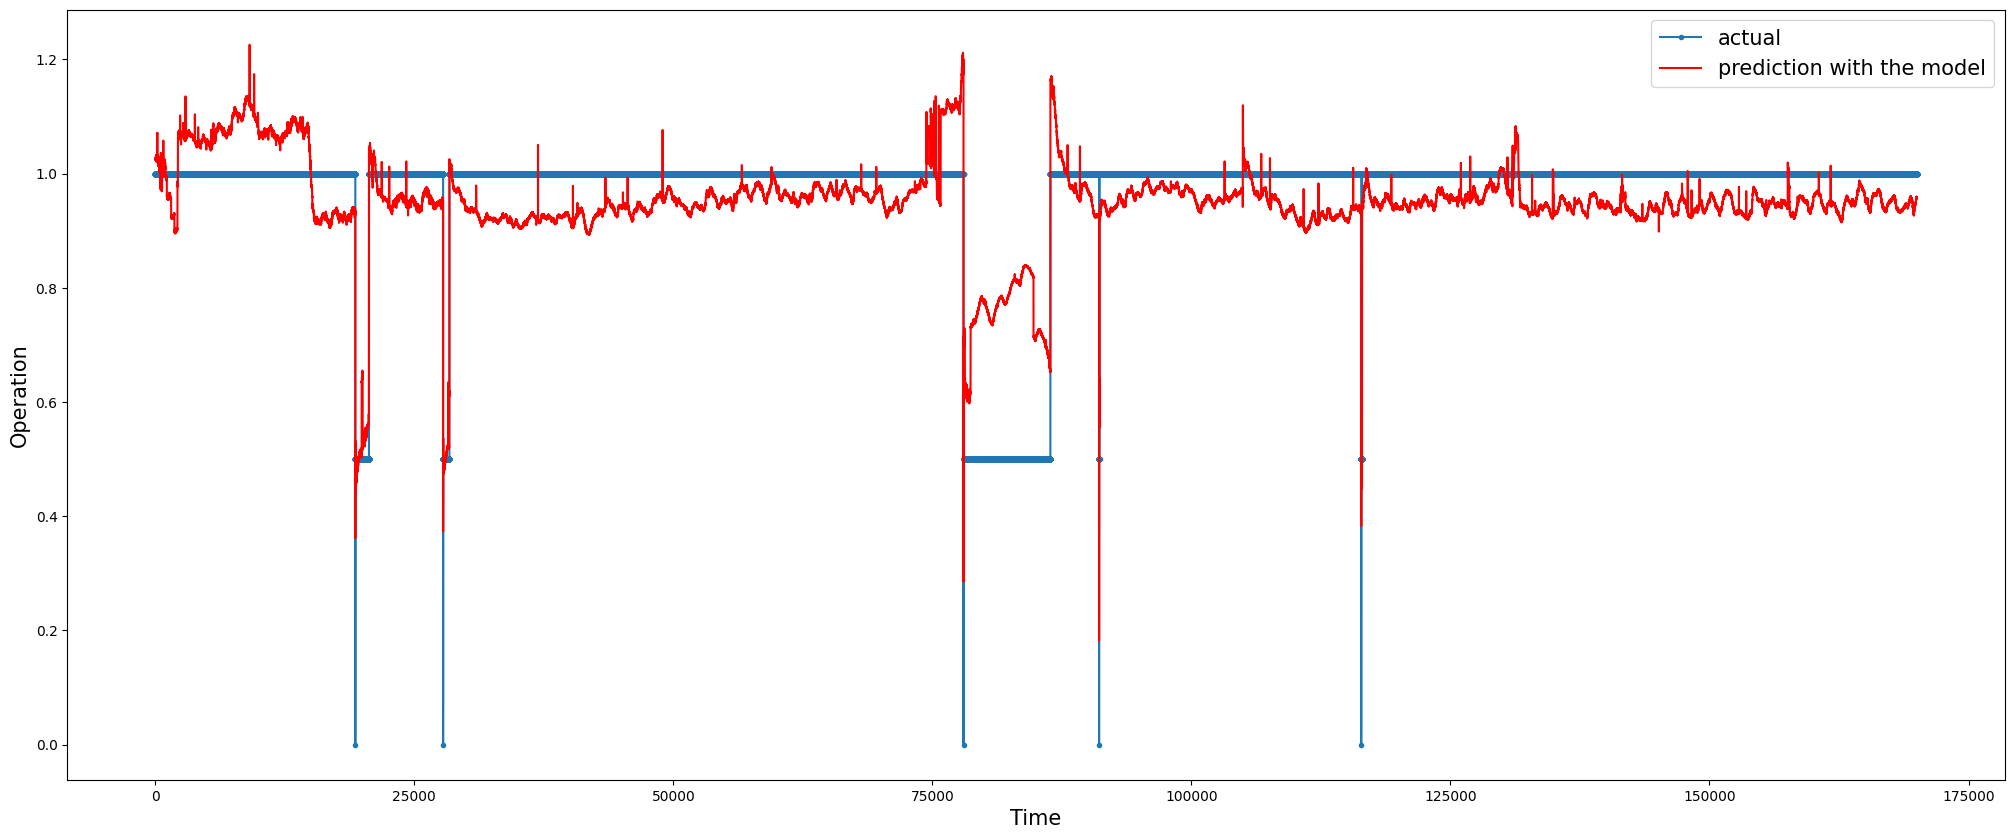

In [ ]:
aa=[x for x in range(170000)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:170000], marker='.', label="actual")
plt.plot(aa, inv_yhat[:170000], 'r', label="prediction with the model")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=15)
plt.show()

# Conclusión:

Las predicciones generadas en el comportamiento de la operación (línea roja) se acercan bastante a la realidad (línea azul) lo que nos indica que el modelo, para esta prueba, es un candidato para predecir estas fallas.

No debemos conformarnos solo con esto. Solo las pruebas en la fábrica o línea de producción, y la medición de las predicciones vs futuras fallas generarán las verdaderas métricas de eficiencia de este modelo y sus versiones futuras.
